In [50]:
# Importing required packages/boilerplate code
import pandas as pd
import os
import sys
import time
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

from static_helpers import *

sys.path.append('../')

directory = "creation"
file_name = "creation_dates_analysis.csv"
complete_path = os.path.join(directory, file_name)
df = []


if file_exists(complete_path):
    df = pd.read_csv(complete_path)
    print("File was successfully loaded in.")
else:
    print("FAIL: File was not loaded in.")
    
# print(df)

File was successfully loaded in.


In [51]:
# Add additional columns for the corrected/formatted dates.
df['Start Date Formatted'] = 0
df['Page Date Formatted'] = 0
df['Time Difference'] = dt.timedelta(seconds=0)
df['Days Difference'] = 0

for i, row in df.iterrows():
    unformatted_start_date = df.at[i, 'Start Date']
    unformatted_page_date = df.at[i, 'Page Creation Date']
    df.at[i, 'Start Date Formatted'] = datetime.strptime(unformatted_start_date, "%Y-%m-%d")
    df.at[i, 'Page Date Formatted'] = datetime.strptime(unformatted_page_date, "%Y-%m-%dT%H:%M:%SZ")
    
# print(df)


In [52]:
for i, row in df.iterrows():
    start_date = df.at[i, 'Start Date Formatted']
    page_date = df.at[i, 'Page Date Formatted']
    
    if (start_date < page_date):
        df.at[i, 'Time Difference'] = page_date - start_date
        df.at[i, 'Days Difference'] = df.at[i, 'Time Difference'].days
    else:
        print("The row below has a page created before the event!")
        print(df[['Titles', 'Start Date Formatted', 'Page Date Formatted']].loc[[i]], "\n\n")
    
# print(df[['Titles', 'Start Date Formatted']])
# print(df[['Titles', 'Start Date Formatted', 'Page Date Formatted', 'Time Difference']])
# print(df[['Titles', 'Time Difference']])
print(df[['Titles', 'Time Difference', 'Days Difference']])

The row below has a page created before the event!
                     Titles Start Date Formatted  Page Date Formatted
4  Hong Kong 1 July marches  2019-07-01 00:00:00  2005-12-05 16:48:19 


The row below has a page created before the event!
                Titles Start Date Formatted  Page Date Formatted
17  Glory to Hong Kong  2019-09-12 00:00:00  2019-09-10 17:11:18 


                                           Titles    Time Difference  \
0                      2019–20 Hong Kong protests   87 days 17:14:51   
1                 2019 Hong Kong extradition bill   77 days 11:05:05   
2                         Murder of Poon Hiu-wing  652 days 07:33:59   
3                                       Demosistō  556 days 11:59:10   
4                        Hong Kong 1 July marches    0 days 00:00:00   
5                        Civil Human Rights Front 1753 days 13:26:17   
6        Hong Kong Human Rights and Democracy Act  896 days 00:12:51   
7        Chinese University of Hong Kong confl

In [58]:
# Remove time differences above zero.
df_without_errors = df[df['Time Difference'] > dt.timedelta(seconds=0)]
# df_without_errors = df[df['Days Difference'] < 10]

# Sort the events from top being the earliest, to bottom being the latest.
df_without_errors = df_without_errors.sort_values(by=['Start Date Formatted'], ascending=False)

print(df_without_errors[['Titles', 'Time Difference', 'Start Date Formatted', 'Page Date Formatted']])

                                           Titles    Time Difference  \
9   Siege of the Hong Kong Polytechnic University    1 days 04:55:33   
20                         Death of Luo Changqing   71 days 05:49:06   
7        Chinese University of Hong Kong conflict    1 days 23:37:20   
8                           Death of Chow Tsz-lok    4 days 23:20:54   
19                                     HKmap.live    1 days 17:00:08   
14                          Death of Chan Yin-lam   54 days 16:03:13   
13              2019 Prince Edward station attack   36 days 06:03:43   
12                                  Hong Kong Way    0 days 22:22:23   
10                          2019 Yuen Long attack    1 days 22:13:59   
11    Storming of the Legislative Council Complex   59 days 21:28:10   
15                 12 June 2019 Hong Kong protest  155 days 14:01:17   
0                      2019–20 Hong Kong protests   87 days 17:14:51   
1                 2019 Hong Kong extradition bill   77 days 11:0

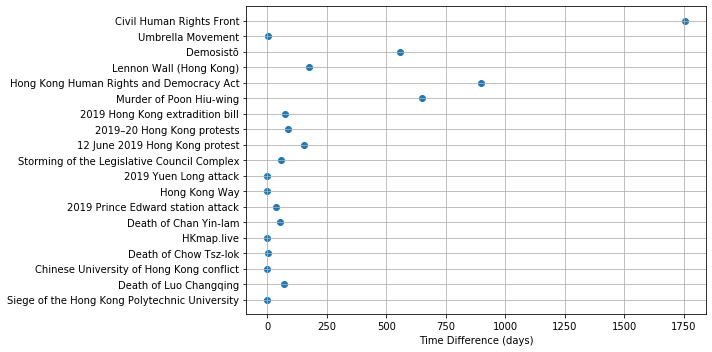

In [56]:
x = df_without_errors['Days Difference'].tolist()
y = df_without_errors['Titles'].tolist()

# xlabels = [1, 2, 7, 30, 60, 90, 365, 1825]

plt.scatter(x, y)

plt.xlabel("Time Difference (days)")

plt.rcParams["figure.figsize"] = (10, 5)

# plt.xticks(xlabels)

# TODO: fix log scale
# plt.xscale("log")

plt.grid(True)

plt.tight_layout()
plt.savefig("day_difference_figure.png", dpi=300)
plt.show()